In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score
#%matplotlib qt

In [2]:
model_file = r"F:\moseq\2022-07-12-moseq-sci-11-animal-prelim\models\bbs_sci_11_animal_subset_rOT_model_1000-13-fixed.p"
index_file = r"F:\moseq\2022-07-12-moseq-sci-11-animal-prelim\moseq2-index.timepoint.yaml"

max_syllable = 73

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
    'before SCI',
    '2d post-SCI',
    '1w post-SCI',
    '2w post-SCI',
    '3w post-SCI',
    '4w post-SCI',
    '5w post-SCI',
    '6w post-SCI',
    '7w post-SCI',
    '8w post-SCI',
    '9w post-SCI',
    '10w post-SCI',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=70, groups=groups)
#groups = list(set(representations.groups))
palette = sns.color_palette('deep', n_colors=len(groups))
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

pruned 2396 transitions which are never used


Best value for parameter "shrinkage" is 0.50, achieving a mean accuracy of ~27.0% ± 7.63% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
              precision    recall  f1-score   support

10w post-SCI       0.00      0.00      0.00         4
 1w post-SCI       1.00      0.33      0.50         3
 2d post-SCI       0.75      1.00      0.86         3
 2w post-SCI       0.50      0.67      0.57         3
 3w post-SCI       0.50      0.25      0.33         4
 4w post-SCI       0.00      0.00      0.00         3
 5w post-SCI       0.00      0.00      0.00         3
 6w post-SCI       0.00      0.00      0.00         4
 7w post-SCI       0.00      0.00      0.00         3
 8w post-SCI       0.20      0.25      0.22         4
 9w post-SCI       0.12      0.33      0.18         3
  before SCI       1.00      1.00      1.00         3

   

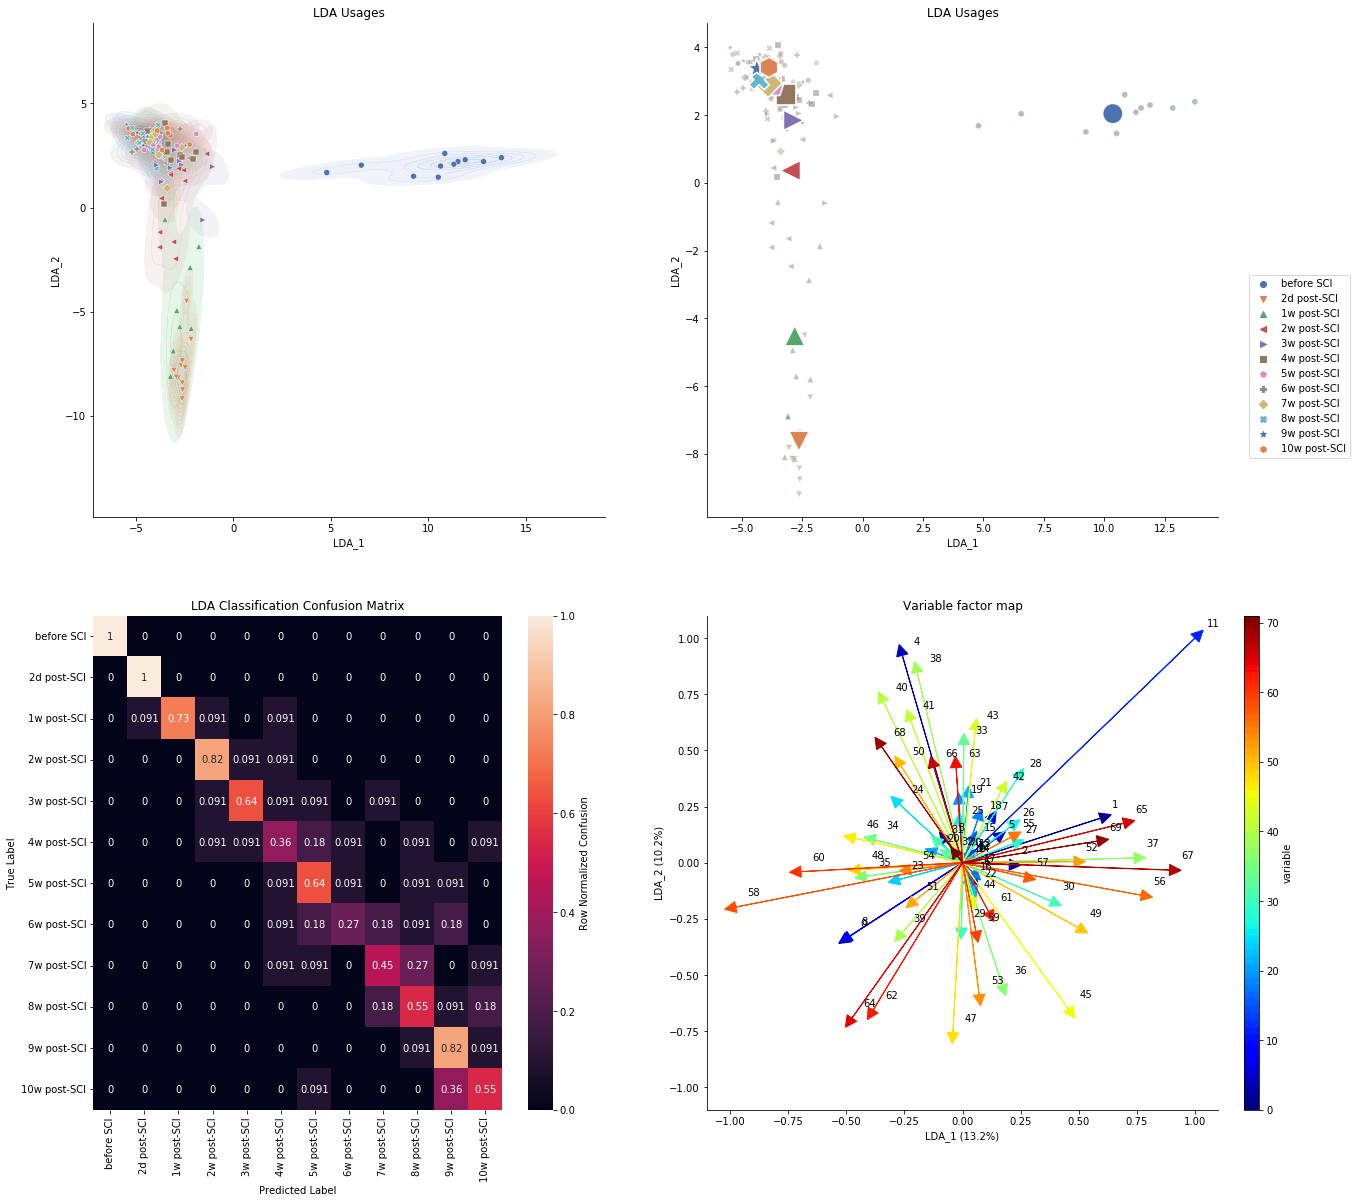

In [4]:
results = train_lda_pipeline(representations, 'usage')

fig, axs, df = plot_lda_results(results.estimator, representations.usage, representations.meta, representations.groups, groups, palette, markers, title='LDA Usages')

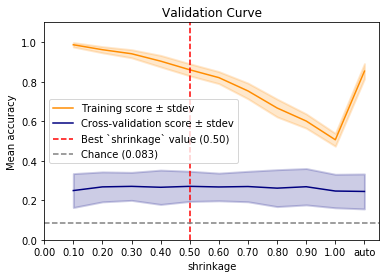

In [5]:
plot_validation_curve(results.cv_result)

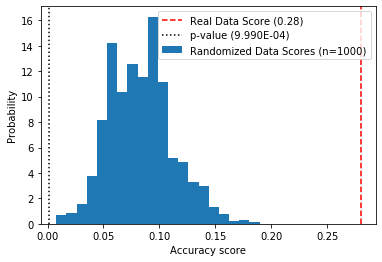

In [6]:
plot_permutation_score(results.estimator, results.data.usage, results.data.groups)